In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
original_data = pd.read_csv('celiac.csv')

In [ ]:
original_data.shape

(2206, 15)

In [ ]:
original_data.head(5)

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,yes
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,yes
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,yes
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,yes
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,yes


In [ ]:
original_data.dtypes

Age                   int64
Gender               object
Diabetes             object
Diabetes Type        object
Diarrhoea            object
Abdominal            object
Short_Stature        object
Sticky_Stool         object
Weight_loss          object
IgA                 float64
IgG                 float64
IgM                 float64
Marsh                object
cd_type              object
Disease_Diagnose     object
dtype: object

In [ ]:
# what are the types of values in the field

print('Gender values are: ', original_data['Gender'].unique())
print('Diabetes values are', original_data['Diabetes'].unique())
print('Diabetes Type values are', original_data['Diabetes Type'].unique())
print('Diarrhoea values are: ', original_data['Diarrhoea'].unique())
print('Abdominal values are', original_data['Abdominal'].unique())
print('Short_Stature values are: ', original_data['Short_Stature'].unique())
print('Sticky_Stool values are: ', original_data['Sticky_Stool'].unique())
print('Weight_loss values are: ', original_data['Weight_loss'].unique())
print('Marsh values are: ', original_data['Marsh'].unique())
print('cd_type values are: ', original_data['cd_type'].unique())
print('Disease_Diagnose values are: ', original_data['Disease_Diagnose'].unique())

Gender values are:  ['Male' 'Female']
Diabetes values are ['Yes' 'no']
Diabetes Type values are ['Type 1' nan 'Type 2']
Diarrhoea values are:  ['inflammatory' 'fatty ' 'watery']
Abdominal values are ['yes' 'no']
Short_Stature values are:  ['PSS' 'Variant ' 'DSS']
Sticky_Stool values are:  ['no' 'yes']
Weight_loss values are:  ['no' 'yes']
Marsh values are:  ['marsh type 0' 'marsh type 3a' 'marsh type 1' 'marsh type 2'
 'marsh type 3b' 'none' 'marsh type 3c']
cd_type values are:  ['potential' 'atypical' 'latent' 'silent' 'typical' 'none']
Disease_Diagnose values are:  ['yes' 'no']


In [ ]:
original_data=original_data.drop(columns=['Disease_Diagnose'])

In [ ]:
#how many null values are there
original_data.isnull().sum()

Age                0
Gender             0
Diabetes           0
Diabetes Type    418
Diarrhoea          0
Abdominal          0
Short_Stature      0
Sticky_Stool       0
Weight_loss        0
IgA                0
IgG                0
IgM                0
Marsh              0
cd_type            0
dtype: int64

In [ ]:
# check for data balancy
original_data['cd_type'].value_counts()

cd_type
atypical     545
silent       400
typical      380
none         350
latent       301
potential    230
Name: count, dtype: int64

In [ ]:
original_data = original_data.fillna('none')

In [ ]:
original_data.isnull().sum()

Age              0
Gender           0
Diabetes         0
Diabetes Type    0
Diarrhoea        0
Abdominal        0
Short_Stature    0
Sticky_Stool     0
Weight_loss      0
IgA              0
IgG              0
IgM              0
Marsh            0
cd_type          0
dtype: int64

In [ ]:
# Label Encoding for categorical variables
label_encoders = {}
for column in original_data.columns:
    if original_data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        original_data[column] = label_encoders[column].fit_transform(original_data[column])

In [ ]:
original_data.dtypes

Age                int64
Gender             int64
Diabetes           int64
Diabetes Type      int64
Diarrhoea          int64
Abdominal          int64
Short_Stature      int64
Sticky_Stool       int64
Weight_loss        int64
IgA              float64
IgG              float64
IgM              float64
Marsh              int64
cd_type            int64
dtype: object

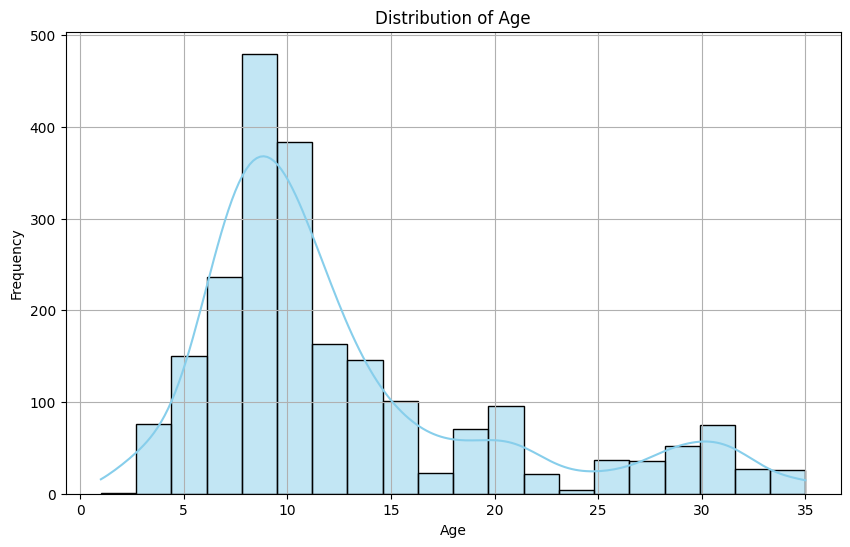

In [ ]:
# Plot Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=original_data, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the correlation between the target column 'cd_type' and all features
correlation= original_data.corr()['cd_type'].sort_values()

In [ ]:
# Select the top 5 features for classification
top_features = correlation.iloc[:5].index.tolist()

In [ ]:
#upsampling to address class imbalance
df_majority = original_data[original_data['cd_type'] == 1]
df_minority = original_data[original_data['cd_type'] == 0]
df_minority_upsampled = df_minority.sample(n=len(df_majority)*5, replace=True, random_state=42)
balanced_data = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
# Split the data into features and target variable
X = original_data[top_features]
y = original_data['cd_type']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
#RF_Classifier
param_grid = {
    'n_estimators': [5],
    'max_depth': [10],
    'max_features': ['sqrt'],
    'min_samples_split': [50],
    'min_samples_leaf': [50],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [ ]:
print ("X_train :", X_train.shape )
print ("y_train :", y_train.shape )

X_train : (1544, 5)
y_train : (1544,)


In [ ]:
# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier()

# Create an instance of the GridSearchCV class
grid_search_rf = GridSearchCV(estimator= rf ,
                              param_grid= param_grid,
                              cv=4,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=2)

In [ ]:
# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [50],
                         'min_samples_split': [50], 'n_estimators': [5]},
             scoring='f1', verbose=2)

In [ ]:
# Best RF parameters:
best_model_rf = grid_search_rf.best_estimator_

best_params_rf = grid_search_rf.best_params_
print("Best RF parameters:", best_params_rf)

Best RF parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 5}


In [ ]:
# Train the model
rf = RandomForestClassifier(n_estimators=5, max_depth=10, max_features='sqrt',
                            min_samples_split=50, min_samples_leaf=50,
                            bootstrap=True, criterion='gini')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=5)

In [ ]:
# Predict on test set
y_pred = rf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8187311178247734


In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)


Confusion matrix: 
 [[143   0   0   0  19   2]
 [  0  87   0   1   2   0]
 [  0   0 105   0   0   0]
 [  0   8   0  51  10   0]
 [ 12   5   0   5  96   2]
 [ 54   0   0   0   0  60]]


In [ ]:
# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)


 Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.87      0.77       164
           1       0.87      0.97      0.92        90
           2       1.00      1.00      1.00       105
           3       0.89      0.74      0.81        69
           4       0.76      0.80      0.78       120
           5       0.94      0.53      0.67       114

    accuracy                           0.82       662
   macro avg       0.86      0.82      0.82       662
weighted avg       0.84      0.82      0.81       662



In [ ]:
# Prompt user for input values
user_input = {}
for feature in top_features:
    if feature in label_encoders:
        unique_values = original_data[feature].unique()
        user_input[feature] = input(f"Enter value for {feature} ({', '.join(map(str, unique_values))}): ")
    else:
        user_input[feature] = float(input(f"Enter value for {feature}: "))

Enter value for Marsh (0, 3, 1, 2, 4, 6, 5): 1
Enter value for IgM: 0.5
Enter value for Short_Stature (1, 2, 0): 2
Enter value for Age: 8
Enter value for IgA: 0.4


In [ ]:
# Encode user input
encoded_input = {}
for feature, value in user_input.items():
    if feature in label_encoders:
        unique_values = original_data[feature].unique()
        if value in unique_values:
            encoded_input[feature] = label_encoders[feature].transform([value])[0]
        else:
            print(f"Invalid value entered for {feature}. Please enter one of the following: {', '.join(map(str, unique_values))}")
            # You can handle this situation however you prefer, for example, asking the user to input again.
    else:
        encoded_input[feature] = value


Invalid value entered for Marsh. Please enter one of the following: 0, 3, 1, 2, 4, 6, 5
Invalid value entered for Short_Stature. Please enter one of the following: 1, 2, 0


In [ ]:
# Ensure all features are present in the input DataFrame
for feature in top_features:
    if feature not in encoded_input:
        if feature in original_data.columns:
            most_common_category = original_data[feature].mode()[0]
            encoded_input[feature] = most_common_category
        else:
            print(f"Warning: Feature '{feature}' not found in the dataset. Skipping...")

In [ ]:
# Convert encoded input to a DataFrame
input_df = pd.DataFrame([encoded_input])

In [ ]:
print("Features used during model fitting:", rf.feature_names_in_)
print("Features in the input DataFrame:", input_df.columns)


Features used during model fitting: ['Marsh' 'IgM' 'Short_Stature' 'Age' 'IgA']
Features in the input DataFrame: Index(['IgM', 'Age', 'IgA', 'Marsh', 'Short_Stature'], dtype='object')


In [ ]:
# Reorder columns in the input DataFrame to match the order used during model fitting
input_df = input_df[rf.feature_names_in_]

In [ ]:
# Classify the type of celiac disease
predicted_cd_type = rf.predict(input_df)

In [ ]:
# Decode the predicted cd_type
cd_type_labels = label_encoders['cd_type'].classes_
predicted_cd_type_label = cd_type_labels[predicted_cd_type[0]]

In [ ]:
# Display the type of celiac disease based on user's input values
print("Classified celiac disease type based on input values:", predicted_cd_type_label)

Classified celiac disease type based on input values: silent
